In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = 'D:\work\Jira_analyses\out_csv.csv'

In [3]:
#load source file
users = pd.read_csv(file,
                        encoding="utf-8-sig",
                       sep=";",
                       usecols =['KEY','AUTHOR_NAME','DATE_CREATED','OLD_VALUE','NEW_VALUE'])

In [4]:
#adding end_dates column to source data frame. end dates are nothing but start_dates shifted on 1 value 
# since each new line has start date which is end date for previous status
end_dates = users['DATE_CREATED'].tolist();
end_dates.pop(0)
end_dates.append('null')
users = users.assign(END_DATES = pd.Series(end_dates))
#print(users.groupby('KEY').tail(2))

In [15]:
#set last end_date for each story as a last update date of the story
oldvalue = users.iloc[0]
for index, row in users.iterrows():
    if oldvalue.KEY != row.KEY :
        users.loc[users.index[index-1],'END_DATES'] = users.loc[users.index[index-1],'DATE_CREATED']  
    oldvalue=row
users.loc[users.index[len(users)-1],'END_DATES'] = users.loc[users.index[len(users)-1],'DATE_CREATED']    

In [14]:
#add time difference in hours
time_diff = users['END_DATES']
time = users[['DATE_CREATED','END_DATES']].apply(lambda x: datetime.strptime(x['END_DATES'],'%d.%m.%Y %H:%M:%S') - datetime.strptime(x['DATE_CREATED'],'%d.%m.%Y %H:%M:%S'), axis=1)
time_h = [a.total_seconds()/3600 for a in time]
users = users.assign(DURATION = pd.Series(time_h))

             KEY  AUTHOR_NAME         DATE_CREATED               OLD_VALUE  \
0    RMSODS-4179         pr10  31.10.2017 10:13:32           To Be Refined   
1    RMSODS-4179         pr10   15.11.2017 8:57:19               In Refine   
2    RMSODS-4179         IC16   16.11.2017 9:26:13         Ready for Build   
3    RMSODS-4179         IC16    23.11.2017 8:38:0                In Build   
4    RMSODS-4179         IC16   23.11.2017 9:20:37                 In Test   
5    RMSODS-4179         IC16   24.11.2017 9:21:27    Ready for Deployment   
6    RMSODS-4072         IC16     12.9.2017 13:8:9  Sub-task To Be Refined   
7    RMSODS-4072         FC82     2.10.2017 1:8:21         Ready for Build   
8    RMSODS-4072         FC82    5.10.2017 8:31:24    Ready for Deployment   
9    RMSODS-4072         FC82     5.10.2017 8:34:2  Deployed, Not Complete   
10   RMSODS-4064         FC82  25.12.2017 15:45:48  Sub-task To Be Refined   
11   RMSODS-4064         FC82  25.12.2017 15:47:44              

In [20]:
grouped_list = users.groupby(['OLD_VALUE'])[['DURATION']].sum()
plt.

                            DURATION
OLD_VALUE                           
Deployed, Not Complete    814.974444
Done                     4538.595556
IDEA - TO DO                0.007222
In Build                68289.187778
In Progress                 0.000000
In Refine               67273.560556
In Test                 35931.822778
Ready for Build         88911.599722
Ready for Deployment    20955.234167
Rejected                 3836.079444
Sub-task Done               3.475556
Sub-task To Be Refined  28971.509444
To Be Refined           82018.923333


(array([2., 1., 1., 1., 1., 2., 1., 1., 1., 2.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

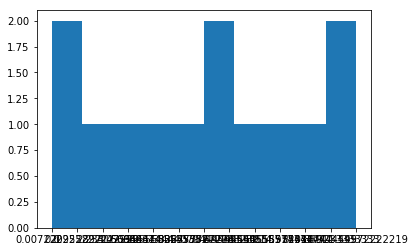

In [23]:
plt.hist(grouped_list)

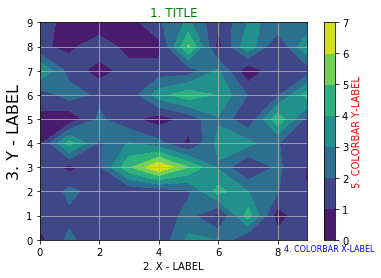

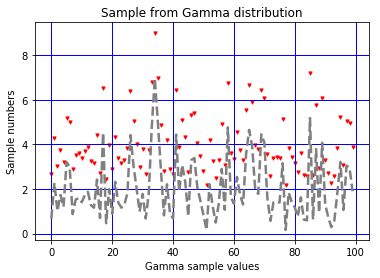

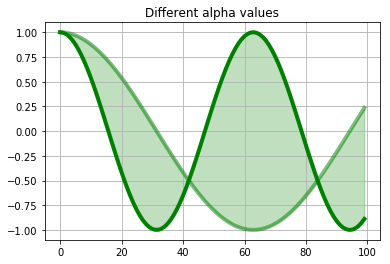

In [25]:
# Пример 1.6.2 Свойства графических элементов

import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)
# Задаём выборку из Гамма-распредления с параметрами формы=1. и масштаба=0.
z = np.random.gamma(2., 1., N)
z1 = np.cos(x/10.)
z2 = np.cos(x/20.)

y = z.reshape(10,10)
#y = np.cos(y)

fig = plt.figure()
cc = plt.contourf(y) 
cbar = plt.colorbar(cc)

plt.title('1. TITLE', color='green')
plt.xlabel('2. X - LABEL')
plt.ylabel('3. Y - LABEL', fontsize=16)

# Подписи для цветовых шкал имеют отличный от остальных подписей синтаксис
cbar.ax.set_xlabel('4. COLORBAR X-LABEL', color='b')
cbar.ax.set_ylabel('5. COLORBAR Y-LABEL', color='r')
plt.grid(True)

fig = plt.figure()

my_dict = {'color' : 'grey', 'linewidth' : 2.5, 'linestyle' : '--'}
xz = [x, z]

# передача параметров через список xz и словарь my_dict. Наличие знаков * и ** обязательно!
cc = plt.plot(*xz, **my_dict) 
# результат аналогичен такой записи
#cc = plt.plot(x, z, color='grey', linewidth=2.5, linestyle='--')

plt.scatter(x, y + 2.0, marker='v', s=10, color='red')

plt.title('Sample from Gamma distribution')
plt.xlabel('Gamma sample values')
plt.ylabel('Sample numbers')

# Подписи для цветовых шкал имеют отличный от остальных подписей синтаксис
cbar.ax.set_xlabel('4. COLORBAR X-LABEL', fontsize=8)
cbar.ax.set_ylabel('5. COLORBAR Y-LABEL', color='r')
plt.grid(True, color='blue', linewidth=1.0)

fig = plt.figure()

# создание словаря
my_dict = {'color' : 'green', 'linewidth' : 4.0, 'alpha' : 0.5} 

plt.fill_between(x, z2, z1, color='green', alpha=0.25) 
plt.plot(x, z1, color='green', linewidth=4.0)
plt.plot(x, z2, **my_dict)
plt.title('Different alpha values')
plt.grid(True)

# смотри преамбулу
#save('pic_1_6_2', fmt='pdf')
#save('pic_1_6_2', fmt='png')

plt.show()